### 1. Set working enviroment

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import math
import sys

### 2. configure notebook

In [12]:
figure1 = True
figure2 = True
figure3 = True

### 3. Generalize normal distribution as ISRF

In [13]:
def generalized_normal(x, fwhm, b=0.5, deriv=False):
    """Generalized normal distribution.

    :param x: A real value or a numpy array of real values.
    :param float fwhm: Full width at half-maximum.
    :param float b: Shape parameter. Value 0.5 for Gauss, towards 0 for a more
        blocky shape, towards 1 for stronger wings.
    :param bool deriv: If True, give the derivative instead of the
        distribution itself. Default is False.
    :return: Value(s) of generalized normal distribution (or its derivative if
        deriv=True) at `x`, normalized to sum 1 for kernels.
    :rtype: list(float)
    """
    const = np.log(2)**b/(fwhm*math.gamma(1+b))
    y = const*2**(-(2*np.abs(x)/fwhm)**(1/b))
    y /= np.sum(y)
    if deriv:
        y *= -(2/fwhm)**(1/b)*np.log(2)*np.sign(x)*np.abs(x)**(1/b-1)/b
    return y

### 4. Spectral grid for ISRF calculation

In [14]:
wave = (np.arange(2000)-1000)/1000
nwave = wave.size

### 5. Vary the b parameter to change block-shape of ISRF with constant FWHM

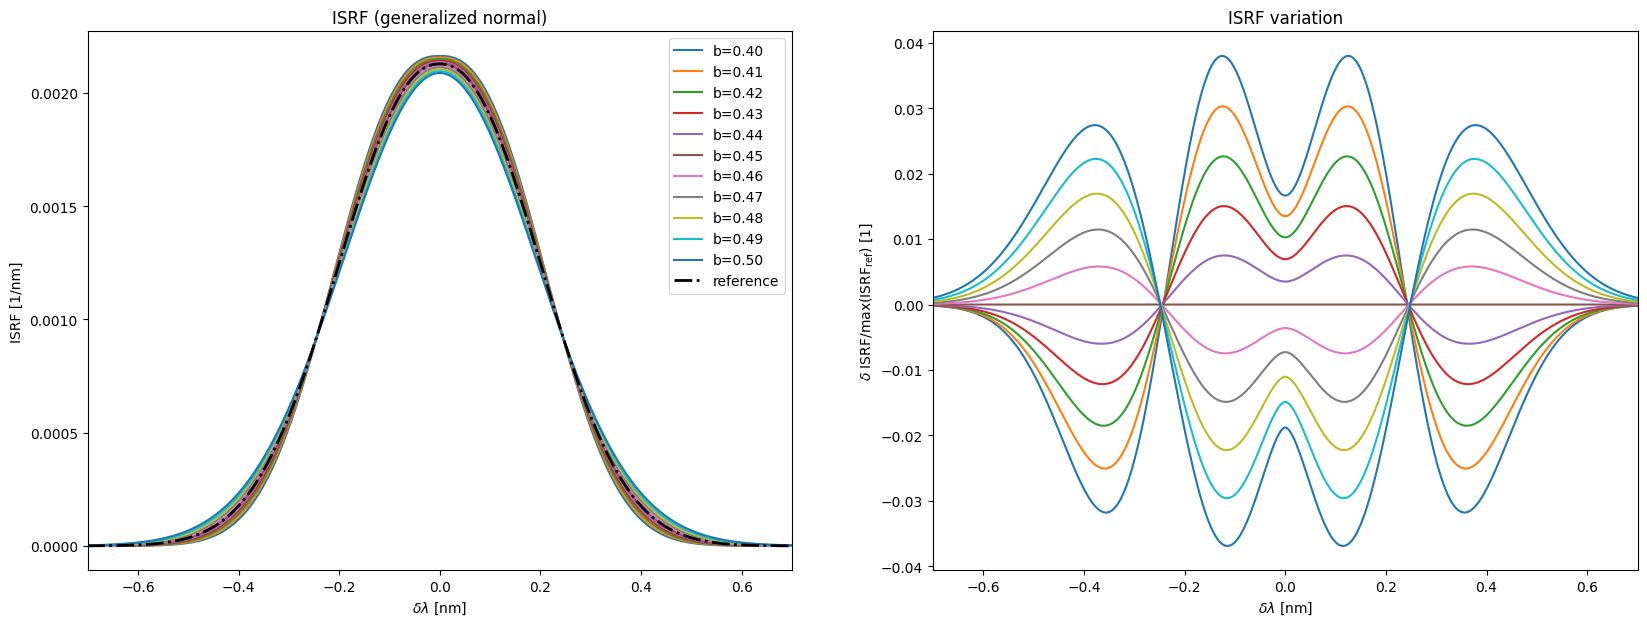

In [15]:
if(figure1):
    fwhm = 0.45
    bconst = np.arange(0, 11)*0.01 + 0.4
    
    fig = plt.figure(figsize=(20, 7), dpi=100,)
    ax1 = fig.add_subplot(121)
    for b in bconst:
        isrf = generalized_normal(wave, fwhm, b)
        ax1.plot(wave, isrf, label='b='+str("{:4.2f}".format(b)))
    isrf = generalized_normal(wave, fwhm, 0.45)
    ax1.plot(wave, isrf, linewidth = 2, color = 'black', linestyle = '-.', label='reference')
    plt.xlim(-0.7, 0.7)
    plt.legend()
    plt.xlabel('$\delta\lambda$ [nm]')
    plt.ylabel('ISRF [1/nm]')
    plt.title('ISRF (generalized normal)')
    
    ax1 = fig.add_subplot(122)
    isrf_ref = generalized_normal(wave, fwhm, 0.45)
    for b in bconst:
        isrf = generalized_normal(wave, fwhm, b)
        ax1.plot(wave, (isrf -isrf_ref)/np.max(isrf_ref), label='b='+str("{:4.2f}".format(b)))
        plt.xlabel('$\delta\lambda$ [nm]')
        plt.ylabel('$\delta$ ISRF/max(ISRF$_\mathrm{ref}$) [1]')
    plt.xlim(-0.7, 0.7)
    plt.title('ISRF variation')
    plt.savefig('plots/exp6.1_isrf_bcoeff.png')

### 6. Change FWHM with constant b parameter

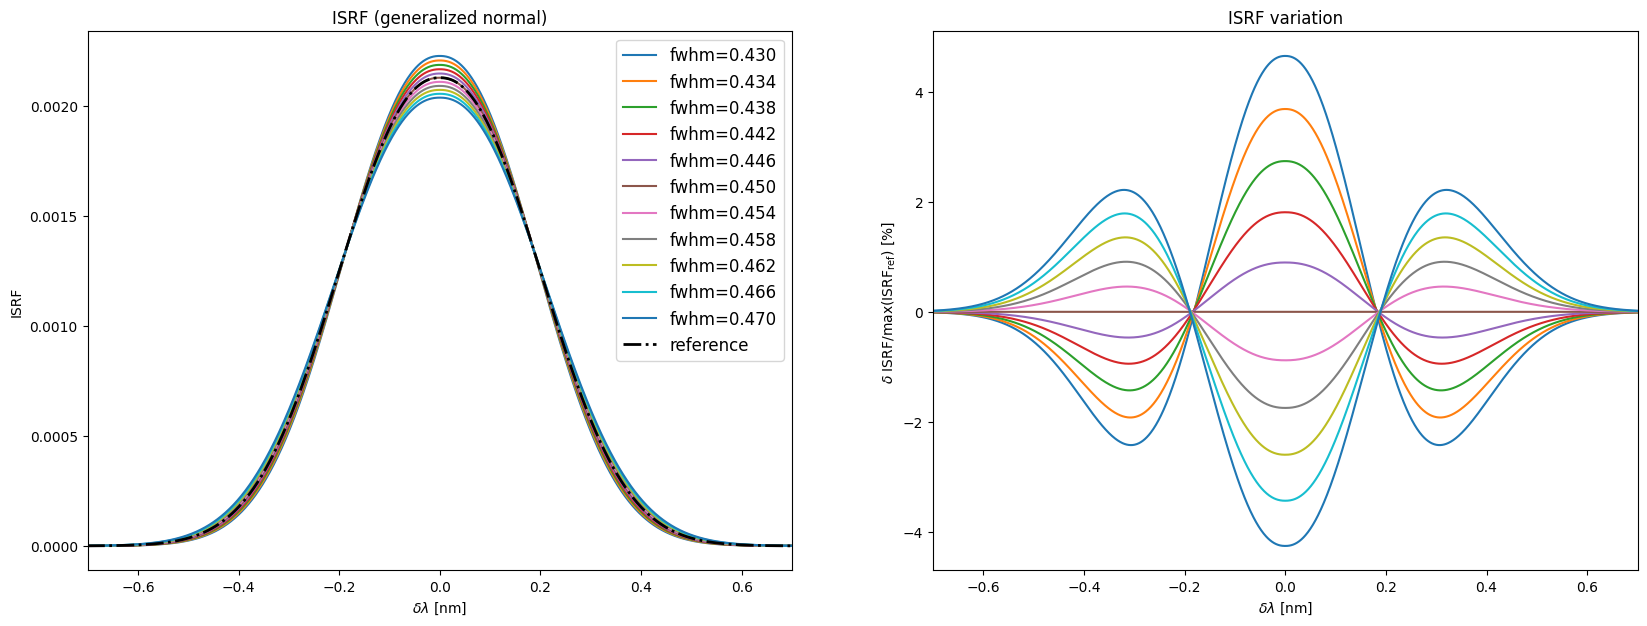

In [16]:
if(figure2):
    bconst = 0.45
    fwhm  = np.arange(0, 11)*0.004 + 0.43
    
    fig = plt.figure(figsize=(20, 7), dpi=100,)
    ax1 = fig.add_subplot(121)
    for ifwhm in fwhm:
        isrf = generalized_normal(wave, ifwhm, bconst)
        ax1.plot(wave, isrf, label='fwhm='+str("{:5.3f}".format(ifwhm)))
    isrf_ref = generalized_normal(wave, 0.45, 0.45)
    ax1.plot(wave, isrf_ref, linewidth = 2, color = 'black', linestyle = '-.', label = 'reference')
    plt.xlim(-0.7, 0.7)
    plt.legend(fontsize='12')
    plt.xlabel('$\delta\lambda$ [nm]')
    plt.ylabel('ISRF')
    plt.title('ISRF (generalized normal)')
    
    ax1 = fig.add_subplot(122)
    isrf_ref = generalized_normal(wave, 0.45, 0.45)
    for ifwhm in fwhm:
        isrf = generalized_normal(wave, ifwhm, bconst)
        ax1.plot(wave, (isrf-isrf_ref)/np.max(isrf_ref)*100., label='fwhm='+str("{:5.3f}".format(ifwhm))+' nm')
        plt.xlabel('$\delta\lambda$ [nm]')
        plt.ylabel('$\delta$ ISRF/max(ISRF$_\mathrm{ref}$) [%] ')
    plt.xlim(-0.7, 0.7)
    plt.title('ISRF variation')
    plt.savefig('plots/exp6.1_isrf_fwhm.png')

### 7. Illustration of the block shape (b=0.5 gives a Gaussian)

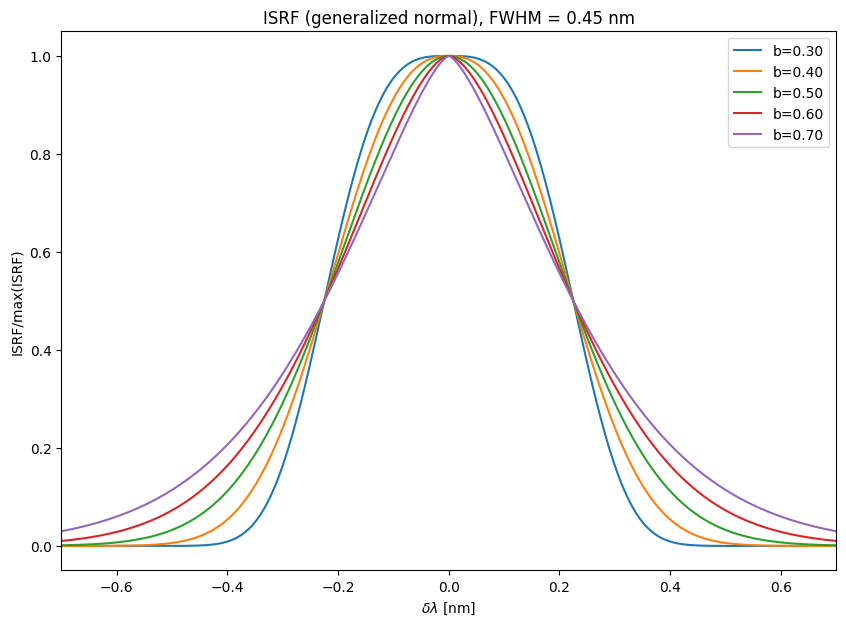

In [17]:

if(figure3):
    fwhm = 0.45
    bconst = np.arange(0, 5)*0.1+ 0.3
    
    fig = plt.figure(figsize=(10, 7), dpi=100,)
    ax1 = fig.add_subplot(111)
    for b in bconst:
        isrf = generalized_normal(wave, fwhm, b)
        ax1.plot(wave, isrf/np.max(isrf),label='b='+str("{:4.2f}".format(b)))
    plt.xlim(-0.7, 0.7)
    plt.legend()
    plt.xlabel('$\delta\lambda$ [nm]')
    plt.ylabel('ISRF/max(ISRF)')
    plt.title('ISRF (generalized normal), FWHM = 0.45 nm')
    plt.savefig('plots/exp6.1_isrf_example.png')